In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [ ]:
pandas.set_option('display.max_columns', 100)
pandas.set_option('display.max_rows', 500)

In [ ]:
file_path = "/content/drive/MyDrive/Corpus/behaviorrevil.csv" # Não esquecer que são varias seções
with open(file_path,"r") as f:
    table = pandas.read_csv(f)
table

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,-297560569024251075,-8905996190074744278,-1315237427267915057,-5188525141683807316,3773855395869290340,-4621510906592543823,-8202596974628287562,-5148262554652272462,-8133837602944132976,7703133083980727768,3910715245136016353,-2594132058191352350,-2169862983768461284,5346917374746308633,670726982787678788,-1538792521363416326,-161034782514252975,1311904431148385559,5616953071871179185,-3383112484468941984,7446189143099786009,5517523452535184853,-5330231582816518795,3858432472936085682,4723964350056832114,-3774111487685577764,-3763717471031213220,-7145596470080406398,6130029800608534432,-2472910566109814745,2982656299343134580,8573919775998881882,3304300203562295760,-3855792943694541602,3876523951249699560,-3803757711606045920,-1525252858283489628,6784342686655044912,-8583060216347732973,9031052329236943738,...,-9093794979537371901,380228926607147031,-2317598038412556037,-3073181249276200921,5664897124571063937,5318818896435818107,-8022116985600958548,-8128404458092288597,-2019048809414474117,-8410208313957407452,3985176844689969301,-8176030794191085092,3027087141462399275,6832114566510935560,-3969321679332577508,-7970502016578517073,-3687153085909794100,6973056549521532005,-4409961320851411971,6571219149455464325,7304156378782111421,-6523416005969913401,5408186363172406965,4986149601595623178,-3171323969934283356,-8285248588543356130,3271958618314543789,-341295030883697257,4091299989746236616,-5371706992964969589,-5955272172951113945,-5258011278153246407,4863479583935071606,9194257278989340457,-1570652458372521493,-228477178176513813,-6762621820239398363,-8553522432763368671,8244057633549715560,-2621629302837596472,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838,id
0,0.001266,0.000576,0.000508,0.000273,0.000790,0.000269,0.000269,0.000188,0.000184,0.000674,0.000215,0.000218,0.000215,0.000215,0.000215,0.000215,0.000218,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000218,0.000215,0.000218,0.000215,0.000215,0.000218,0.000215,0.000218,0.000215,0.000215,0.000215,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,612
1,0.000502,0.000301,0.000183,0.000066,0.000000,0.000021,0.000021,0.000044,0.000028,0.000000,0.000083,0.000084,0.000083,0.000083,0.000083,0.000083,0.000084,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000084,0.000083,0.000084,0.000083,0.000083,0.000084,0.000083,0.000084,0.000083,0.000083,0.000083,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,613
2,0.000567,0.000468,0.000180,0.000145,0.000000,0.000344,0.000344,0.000080,0.000078,0.000000,0.000229,0.000231,0.000229,0.000229,0.000229,0.000229,0.000231,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.

In [ ]:
family = []

for i in range(len(table)):
    if 192<=table["id"][i]<=206:
        family.append("clop")
    elif(207<=table["id"][i]<=310):
        family.append("conti")
    elif(311<=table["id"][i]<=355):
        family.append("egregor")
    elif(403<=table["id"][i]<=435):
        family.append("lockbit")
    elif(438<=table["id"][i]<=451):
        family.append("lockbit")
    elif(452<=table["id"][i]<=468):
        family.append("mountlocker")
    elif(480<=table["id"][i]<=557):
        family.append("netwalker")
    elif(559<=table["id"][i]<=611):
        family.append("ryuk")
    elif(612<=table["id"][i]<=711):
        family.append("revil")
    elif(712<=table["id"][i]<=784):
        family.append("goodware")
    elif(791<table["id"][i]<1446):
        family.append("revil")
    else:
        family.append("unknown")

In [ ]:
# Tem que fazer um if pra percorrer o table e o family pois parece que há alguma omissão na atribuição das famílias e isso está fazendo dar erro nos classificadores.
# descobrir a ID das amostras que estão fora da classificação
#for i in range(max(table.shape[0], len(family)):
#    print(i, table['id'][i], family[i])

Nesta célula, foi criado o vetor de classificação que vou usar como atributo alvo

In [ ]:
len(family), table.shape

(164, (164, 332480))

In [ ]:
table['family'] = family
table

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,-297560569024251075,-8905996190074744278,-1315237427267915057,-5188525141683807316,3773855395869290340,-4621510906592543823,-8202596974628287562,-5148262554652272462,-8133837602944132976,7703133083980727768,3910715245136016353,-2594132058191352350,-2169862983768461284,5346917374746308633,670726982787678788,-1538792521363416326,-161034782514252975,1311904431148385559,5616953071871179185,-3383112484468941984,7446189143099786009,5517523452535184853,-5330231582816518795,3858432472936085682,4723964350056832114,-3774111487685577764,-3763717471031213220,-7145596470080406398,6130029800608534432,-2472910566109814745,2982656299343134580,8573919775998881882,3304300203562295760,-3855792943694541602,3876523951249699560,-3803757711606045920,-1525252858283489628,6784342686655044912,-8583060216347732973,9031052329236943738,...,380228926607147031,-2317598038412556037,-3073181249276200921,5664897124571063937,5318818896435818107,-8022116985600958548,-8128404458092288597,-2019048809414474117,-8410208313957407452,3985176844689969301,-8176030794191085092,3027087141462399275,6832114566510935560,-3969321679332577508,-7970502016578517073,-3687153085909794100,6973056549521532005,-4409961320851411971,6571219149455464325,7304156378782111421,-6523416005969913401,5408186363172406965,4986149601595623178,-3171323969934283356,-8285248588543356130,3271958618314543789,-341295030883697257,4091299989746236616,-5371706992964969589,-5955272172951113945,-5258011278153246407,4863479583935071606,9194257278989340457,-1570652458372521493,-228477178176513813,-6762621820239398363,-8553522432763368671,8244057633549715560,-2621629302837596472,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838,id,family
0,0.001266,0.000576,0.000508,0.000273,0.000790,0.000269,0.000269,0.000188,0.000184,0.000674,0.000215,0.000218,0.000215,0.000215,0.000215,0.000215,0.000218,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000215,0.000218,0.000215,0.000218,0.000215,0.000215,0.000218,0.000215,0.000218,0.000215,0.000215,0.000215,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,612,revil
1,0.000502,0.000301,0.000183,0.000066,0.000000,0.000021,0.000021,0.000044,0.000028,0.000000,0.000083,0.000084,0.000083,0.000083,0.000083,0.000083,0.000084,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000084,0.000083,0.000084,0.000083,0.000083,0.000084,0.000083,0.000084,0.000083,0.000083,0.000083,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,613,revil
2,0.000567,0.000468,0.000180,0.000145,0.000000,0.000344,0.000344,0.000080,0.000078,0.000000,0.000229,0.000231,0.000229,0.000229,0.000229,0.000229,0.000231,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.000229,0.00022

In [ ]:
table.drop(columns=['id'], inplace=True)

In [ ]:
rem = table.loc[table['family'] == 'unknown']
rem

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,-297560569024251075,-8905996190074744278,-1315237427267915057,-5188525141683807316,3773855395869290340,-4621510906592543823,-8202596974628287562,-5148262554652272462,-8133837602944132976,7703133083980727768,3910715245136016353,-2594132058191352350,-2169862983768461284,5346917374746308633,670726982787678788,-1538792521363416326,-161034782514252975,1311904431148385559,5616953071871179185,-3383112484468941984,7446189143099786009,5517523452535184853,-5330231582816518795,3858432472936085682,4723964350056832114,-3774111487685577764,-3763717471031213220,-7145596470080406398,6130029800608534432,-2472910566109814745,2982656299343134580,8573919775998881882,3304300203562295760,-3855792943694541602,3876523951249699560,-3803757711606045920,-1525252858283489628,6784342686655044912,-8583060216347732973,9031052329236943738,...,-9093794979537371901,380228926607147031,-2317598038412556037,-3073181249276200921,5664897124571063937,5318818896435818107,-8022116985600958548,-8128404458092288597,-2019048809414474117,-8410208313957407452,3985176844689969301,-8176030794191085092,3027087141462399275,6832114566510935560,-3969321679332577508,-7970502016578517073,-3687153085909794100,6973056549521532005,-4409961320851411971,6571219149455464325,7304156378782111421,-6523416005969913401,5408186363172406965,4986149601595623178,-3171323969934283356,-8285248588543356130,3271958618314543789,-341295030883697257,4091299989746236616,-5371706992964969589,-5955272172951113945,-5258011278153246407,4863479583935071606,9194257278989340457,-1570652458372521493,-228477178176513813,-6762621820239398363,-8553522432763368671,8244057633549715560,-2621629302837596472,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838,family


In [ ]:
items_to_remove = rem.index.values.tolist()
items_to_remove

[]

In [ ]:
# removendo os unknown pela lista gerada
table.drop(table.index[items_to_remove], inplace=True)
'unknown' in table['family']

False

In [ ]:
family_table = table.copy()


In [ ]:
#table = family_table.copy()  # Esse trecho é somente para reaproveitar o carregamento do dataset

In [ ]:
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'clop')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'conti')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'egregor')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'lockbit')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'mountlocker')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'netwalker')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'revil')].copy()
#table = family_table.loc[(family_table['family'] == 'goodware') | (family_table['family'] == 'ryuk')].copy()

In [ ]:
table.describe()

,5382530088351570985,2038340943568240459,-3495225287822563407,-6184167012816453708,7099738312180619692,-1286049657302595261,3682553184252715219,-461646535997385497,-448961166194655894,2291019426270880460,-297560569024251075,-8905996190074744278,-1315237427267915057,-5188525141683807316,3773855395869290340,-4621510906592543823,-8202596974628287562,-5148262554652272462,-8133837602944132976,7703133083980727768,3910715245136016353,-2594132058191352350,-2169862983768461284,5346917374746308633,670726982787678788,-1538792521363416326,-161034782514252975,1311904431148385559,5616953071871179185,-3383112484468941984,7446189143099786009,5517523452535184853,-5330231582816518795,3858432472936085682,4723964350056832114,-3774111487685577764,-3763717471031213220,-7145596470080406398,6130029800608534432,-2472910566109814745,2982656299343134580,8573919775998881882,3304300203562295760,-3855792943694541602,3876523951249699560,-3803757711606045920,-1525252858283489628,6784342686655044912,-8583060216347732973,9031052329236943738,...,-4447618397916838916,-9093794979537371901,380228926607147031,-2317598038412556037,-3073181249276200921,5664897124571063937,5318818896435818107,-8022116985600958548,-8128404458092288597,-2019048809414474117,-8410208313957407452,3985176844689969301,-8176030794191085092,3027087141462399275,6832114566510935560,-3969321679332577508,-7970502016578517073,-3687153085909794100,6973056549521532005,-4409961320851411971,6571219149455464325,7304156378782111421,-6523416005969913401,5408186363172406965,4986149601595623178,-3171323969934283356,-8285248588543356130,3271958618314543789,-341295030883697257,4091299989746236616,-5371706992964969589,-5955272172951113945,-5258011278153246407,4863479583935071606,9194257278989340457,-1570652458372521493,-228477178176513813,-6762621820239398363,-8553522432763368671,8244057633549715560,-2621629302837596472,2928935586553899192,3592312483698901076,3891766720362175360,4741820939497244407,3052972953189331242,-5870216326540581167,-4588096417221536179,4819813997944399364,-8078455863905672838
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.059874,0.026822,0.009577,0.006867,0.000027,0.000080,0.000079,0.003566,0.003755,0.000004,0.000056,0.000056,0.000055,0.000054,0.000056,0.000055,0.000054,0.000056,0.000056,0.000056,0.000056,0.000054,0.000054,0.000056,0.000054,0.000055,0.000056,0.000056,0.000053,0.000055,0.000055,0.000055,0.000055,0.000055,0.000054,0.000056,0.000056,0.000052,0.000056,0.000055,0.000056,0.000055,0.000056,0.000055,0.000055,0.000057,0.000055,0.000056,0.000055,0.000056,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000689,0.000689,0.000689,0.000689,0.000317,0.000317,0.000317,0.000317,0.000317,0.000317,0.000317,0.000451,0.000277,0.000277,0.000138,0

In [ ]:
TestSize = 0.5

In [ ]:
#classes = pandas.DataFrame(table, columns = ['family'])
classes = list(table['family'])
table.drop(columns=['family'], inplace=True)

In [ ]:
table.shape

In [ ]:
len(classes)

In [ ]:
#table

In [ ]:
#classes.count("lockbit"),classes.count("goodware")  #isso aqui é somente para classificação binária

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(table, classes, test_size=TestSize, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.60      0.91      0.72        32
     egregor       0.00      0.00      0.00        17
    goodware       0.84      0.88      0.86        24
     lockbit       0.68      0.87      0.76        15

    accuracy                           0.68        94
   macro avg       0.63      0.56      0.53        94
weighted avg       0.59      0.68      0.61        94

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 32 µs, sys: 2 µs, total: 34 µs
Wall time: 9.54 µs


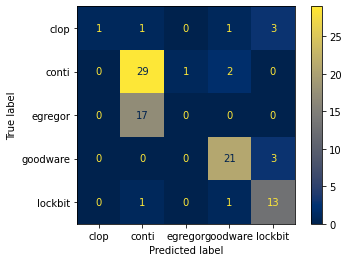

In [ ]:
# KNN com GridSearch
param_gridKNN = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid.fit(previsores_treinamento, classe_treinamento)
predictKNNgrid = modelKNNgrid.predict(previsores_teste)
print(metrics.classification_report(classe_teste, predictKNNgrid))
print(modelKNNgrid.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictKNNgrid)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning

              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         6
       conti       0.86      0.78      0.82        32
     egregor       0.71      1.00      0.83        17
    goodware       0.79      0.46      0.58        24
     lockbit       0.52      0.93      0.67        15

    accuracy                           0.71        94
   macro avg       0.57      0.63      0.58        94
weighted avg       0.70      0.71      0.68        94

{'C': 20, 'kernel': 'linear'}
CPU times: user 33 µs, sys: 2 µs, total: 35 µs
Wall time: 10 µs


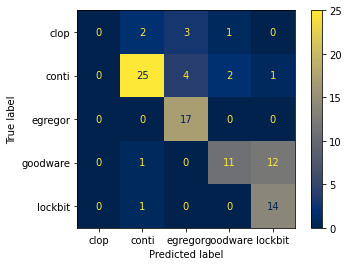

In [ ]:
# SVM com GridSearch
param_gridsvm = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid.fit(previsores_treinamento, classe_treinamento)
predictsvm = modelsvmgrid.predict(previsores_teste)
print(metrics.classification_report(classe_teste, predictsvm))
print(modelsvmgrid.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictsvm)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

              precision    recall  f1-score   support

        clop       0.05      0.17      0.08         6
       conti       0.81      0.53      0.64        32
     egregor       0.71      1.00      0.83        17
    goodware       0.53      0.33      0.41        24
     lockbit       0.93      0.87      0.90        15

    accuracy                           0.60        94
   macro avg       0.61      0.58      0.57        94
weighted avg       0.69      0.60      0.62        94

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


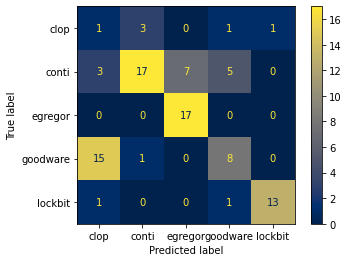

In [ ]:
# No caso do Naive Bayes, não há hiperparâmetros para manipular, logo não faz sentido utilizar Grid Search
modelGNB = GaussianNB()
modelGNB.fit(previsores_treinamento, classe_treinamento)
previsaoGNB = modelGNB.predict(previsores_teste)
print(metrics.classification_report(classe_teste, previsaoGNB))
cm = metrics.confusion_matrix(classe_teste, previsaoGNB)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         6
       conti       0.87      0.84      0.86        32
     egregor       0.85      1.00      0.92        17
    goodware       0.80      1.00      0.89        24
     lockbit       1.00      0.87      0.93        15

    accuracy                           0.86        94
   macro avg       0.70      0.74      0.72        94
weighted avg       0.81      0.86      0.83        94

{'criterion': 'entropy', 'max_depth': 8}
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


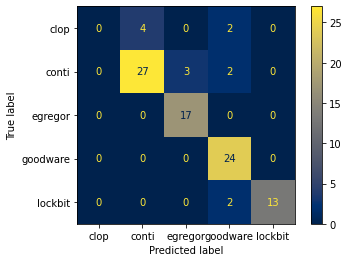

In [ ]:
# Decision Tree com GridSearch
param_gridtree = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid.fit(previsores_treinamento, classe_treinamento)
predicttree = modeltreegrid.predict(previsores_teste)
print(metrics.classification_report(classe_teste, predicttree))
print(modeltreegrid.best_params_)
cm = metrics.confusion_matrix(classe_teste, predicttree)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.88      0.88      0.88        32
     egregor       0.89      1.00      0.94        17
    goodware       0.79      0.96      0.87        24
     lockbit       1.00      0.87      0.93        15

    accuracy                           0.87        94
   macro avg       0.91      0.77      0.78        94
weighted avg       0.89      0.87      0.86        94

{'criterion': 'gini', 'n_estimators': 50}
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


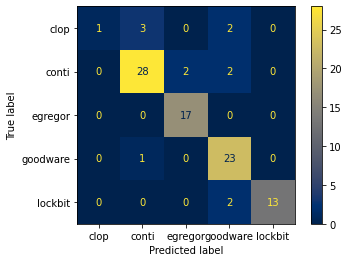

In [ ]:
# RandomForest com GridSearch
param_gridrf = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

#param_gridrf = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid = GridSearchCV(RandomForestClassifier(), param_gridrf, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid.fit(previsores_treinamento, classe_treinamento)
predictrf = modelrfgrid.predict(previsores_teste)
print(metrics.classification_report(classe_teste, predictrf))
print(modelrfgrid.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictrf)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid.classes_).plot(cmap='cividis')
%time

O MLP deu erro de zerodivision (tanto usando grid search quanto para sem o grid)

In [ ]:
from sklearn.neural_network import MLPClassifier

Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization.

**The Input Layer:** the number of neurons comprising that layer is equal to the number of features (columns) in your data.

**The Output Layer:** If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.

**The Hidden Layers:** One hidden layer is sufficient for the large majority of problems. The most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) the number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.

In [ ]:
# MLP com GridSearch

#param_gridmlp = {'hidden_layer_sizes': [(4,4), (50,50,50), (50,100,50), (100,)],'solver':['lbfgs', 'sgd','adam'],  'activation': ['logistic', 'relu', 'identity', 'tanh'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}
#modelmlpgrid = GridSearchCV(MLPClassifier(hidden_layer_sizes=(4,4), max_iter=50000000, tol=0.0001, random_state = 12, verbose = True), param_gridmlp, n_jobs=-1, cv=5, error_score='raise')
#modelmlpgrid.fit(previsores_treinamento, classe_treinamento)
#predictmlp = modelmlpgrid.predict(previsores_teste)
#print(metrics.classification_report(classe_teste, predictmlp))
#print(modelmlpgrid.best_params_)
#cm = metrics.confusion_matrix(classe_teste, predictmlp)
#metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlpgrid.classes_).plot(cmap='cividis')
#%time

Iteration 1, loss = 1.61200245
Iteration 2, loss = 1.60471962
Iteration 3, loss = 1.59772385
Iteration 4, loss = 1.59101131
Iteration 5, loss = 1.58410921
Iteration 6, loss = 1.57701689
Iteration 7, loss = 1.57021739
Iteration 8, loss = 1.56330888
Iteration 9, loss = 1.55679864
Iteration 10, loss = 1.55022279
Iteration 11, loss = 1.54338446
Iteration 12, loss = 1.53622395
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         6
       conti       0.34      1.00      0.51        32
     egregor       0.00      0.00      0.00        17
    goodware       0.00      0.00      0.00        24
     lockbit       0.00      0.00      0.00        15

    accuracy                           0.34        94
   macro avg       0.07      0.20      0.10        94
weighted avg       0.12      0.34      0.17        94

CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 9.54 µs


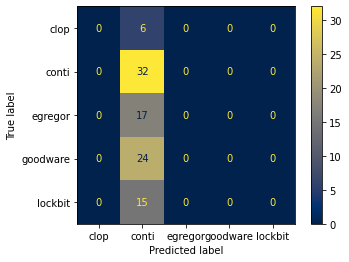

In [ ]:
modelmlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp.fit(previsores_treinamento, classe_treinamento)
predictmlp = modelmlp.predict(previsores_teste)
print(metrics.classification_report(classe_teste, predictmlp))
cm = metrics.confusion_matrix(classe_teste, predictmlp)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp.classes_).plot(cmap='cividis')
%time

#Fazer aqui um apanhado geral das classificações realizadas sem o Standard Scaler para a abordagem de chamadas de API

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
table_sc = sc.fit_transform(table)
table_sc

array([[-0.19736232,  3.97206927,  5.52651506, ..., -0.05954913,
        -0.05954913, -0.05954913],
       [ 0.12424087,  0.68527916,  1.26307758, ..., -0.05954913,
        -0.05954913, -0.05954913],
       [-0.19736232,  3.97206927,  5.52651506, ..., -0.05954913,
        -0.05954913, -0.05954913],
       ...,
       [-0.53236564, -0.592917  , -0.39492589, ..., -0.05954913,
        -0.05954913, -0.05954913],
       [-0.53236564, -0.592917  , -0.39492589, ..., -0.05954913,
        -0.05954913, -0.05954913],
       [-0.53236564, -0.592917  , -0.39492589, ..., -0.05954913,
        -0.05954913, -0.05954913]])

In [ ]:
from sklearn.model_selection import train_test_split
previsores_treinamento_sc, previsores_teste_sc, classe_treinamento, classe_teste = train_test_split(table_sc, classes, test_size=TestSize, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Inserir arqui o Grid Search dos classificadores do mesmo jeito que fiz em cima

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.49      0.59      0.54        32
     egregor       0.00      0.00      0.00        17
    goodware       0.57      0.96      0.72        24
     lockbit       0.93      0.87      0.90        15

    accuracy                           0.60        94
   macro avg       0.60      0.52      0.49        94
weighted avg       0.52      0.60      0.53        94

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 9.54 µs


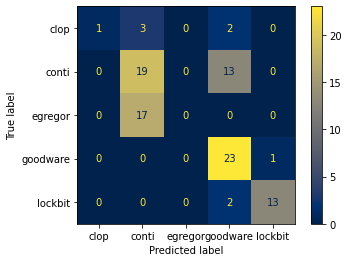

In [ ]:
# KNN com Grid Search CV com StandardScaler
param_gridKNN_sc = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid_sc = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid_sc.fit(previsores_treinamento_sc, classe_treinamento)
predictKNNgrid_sc = modelKNNgrid_sc.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, predictKNNgrid_sc))
print(modelKNNgrid_sc.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictKNNgrid_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid_sc.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn import svm

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.59      0.94      0.72        32
     egregor       0.00      0.00      0.00        17
    goodware       0.79      0.92      0.85        24
     lockbit       0.93      0.87      0.90        15

    accuracy                           0.70        94
   macro avg       0.66      0.58      0.55        94
weighted avg       0.61      0.70      0.62        94

{'C': 3, 'kernel': 'linear'}
CPU times: user 34 µs, sys: 4 µs, total: 38 µs
Wall time: 9.3 µs


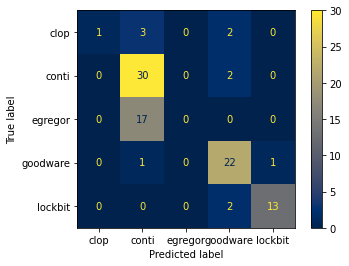

In [ ]:
# SVM com Grid Search CV StandardScaler
param_gridsvm_sc = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid_sc = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid_sc.fit(previsores_treinamento_sc, classe_treinamento)
predictsvm_sc = modelsvmgrid_sc.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, predictsvm_sc))
print(modelsvmgrid_sc.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictsvm_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid_sc.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

              precision    recall  f1-score   support

        clop       0.05      0.17      0.08         6
       conti       0.79      0.47      0.59        32
     egregor       0.71      1.00      0.83        17
    goodware       0.41      0.29      0.34        24
     lockbit       0.87      0.87      0.87        15

    accuracy                           0.56        94
   macro avg       0.57      0.56      0.54        94
weighted avg       0.64      0.56      0.58        94

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


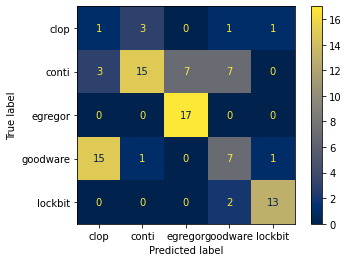

In [ ]:
# Naive Bayes com StandardScaler
# No caso do Naive Bayes, não há hiperparâmetros para manipular, logo não faz sentido utilizar GridSearch
modelGNB_sc = GaussianNB()
modelGNB_sc.fit(previsores_treinamento_sc, classe_treinamento)
previsaoGNB_sc = modelGNB_sc.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, previsaoGNB_sc))
cm = metrics.confusion_matrix(classe_teste, previsaoGNB_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB_sc.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         6
       conti       0.87      0.84      0.86        32
     egregor       0.85      1.00      0.92        17
    goodware       0.80      1.00      0.89        24
     lockbit       1.00      0.87      0.93        15

    accuracy                           0.86        94
   macro avg       0.70      0.74      0.72        94
weighted avg       0.81      0.86      0.83        94

{'criterion': 'entropy', 'max_depth': 8}
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


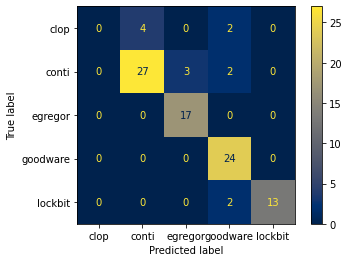

In [ ]:
# Decision Tree com Grid Search CV StandardScaler
param_gridtree_sc = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid_sc = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid_sc.fit(previsores_treinamento_sc, classe_treinamento)
predicttree_sc = modeltreegrid_sc.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, predicttree_sc))
print(modeltreegrid_sc.best_params_)
cm = metrics.confusion_matrix(classe_teste, predicttree_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid_sc.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.88      0.88      0.88        32
     egregor       0.89      1.00      0.94        17
    goodware       0.79      0.96      0.87        24
     lockbit       1.00      0.87      0.93        15

    accuracy                           0.87        94
   macro avg       0.91      0.77      0.78        94
weighted avg       0.89      0.87      0.86        94

{'criterion': 'gini', 'n_estimators': 81}
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


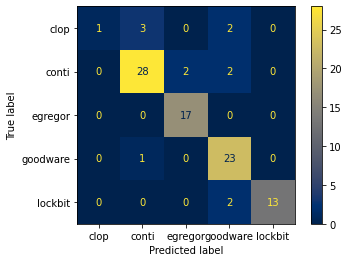

In [ ]:
# Random Forest com Grid Search CV StandardScaler

#param_gridrf_sc = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

param_gridrf_sc = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid_sc = GridSearchCV(RandomForestClassifier(), param_gridrf_sc, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid_sc.fit(previsores_treinamento_sc, classe_treinamento)
predictrf_sc = modelrfgrid_sc.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, predictrf_sc))
print(modelrfgrid_sc.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictrf_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid_sc.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.neural_network import MLPClassifier

Iteration 1, loss = 1.62383078
Iteration 2, loss = 5.67793996
Iteration 3, loss = 8.87099008
Iteration 4, loss = 5.90668124
Iteration 5, loss = 4.73512617
Iteration 6, loss = 9.05469204
Iteration 7, loss = 5.05777672
Iteration 8, loss = 5.97392465
Iteration 9, loss = 6.41767974
Iteration 10, loss = 5.99499636
Iteration 11, loss = 4.78786779
Iteration 12, loss = 3.32676718
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         6
       conti       0.43      1.00      0.60        32
     egregor       0.00      0.00      0.00        17
    goodware       1.00      0.12      0.22        24
     lockbit       0.88      0.93      0.90        15

    accuracy                           0.52        94
   macro avg       0.46      0.41      0.34        94
weighted avg       0.54      0.52      0.40        94

CPU times: user 35 µs, sys: 5 µs, total: 40 µs
Wall time: 10.3 µs


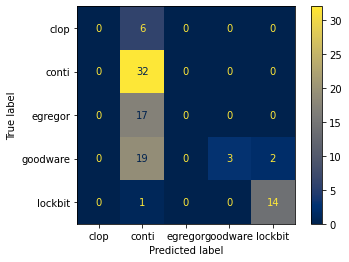

In [ ]:
# MLP com Grid Search CV StandardScaler
modelmlp_sc = MLPClassifier(hidden_layer_sizes=(500,200,10), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp_sc.fit(previsores_treinamento_sc, classe_treinamento)
predictmlp_sc = modelmlp_sc.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, predictmlp_sc))
cm = metrics.confusion_matrix(classe_teste, predictmlp_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp_sc.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100) # da pra fazer Grid Search com PCA? Qual a quantidade ótima de parametros para melhorar a classificação?
table_pca = pca.fit_transform(table_sc)

In [ ]:
#df_pca = pandas.DataFrame(table_pca)
#df_pca

In [ ]:
previsores_treinamento_pca, previsores_teste_pca, classe_treinamento, classe_teste = train_test_split(table_pca, classes, test_size=TestSize, random_state=1)

              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.77      0.62      0.69        32
     egregor       0.83      0.88      0.86        17
    goodware       0.72      0.88      0.79        24
     lockbit       0.65      0.87      0.74        15

    accuracy                           0.74        94
   macro avg       0.80      0.68      0.67        94
weighted avg       0.77      0.74      0.73        94

{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs


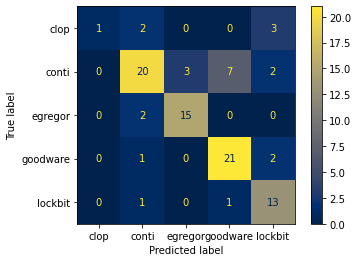

In [ ]:
# KNN com GrideSarch e PCA
param_gridKNN_PCA = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid_PCA = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid_PCA.fit(previsores_treinamento_pca, classe_treinamento)
predictKNNgrid_PCA = modelKNNgrid_PCA.predict(previsores_teste_pca)
print(metrics.classification_report(classe_teste, predictKNNgrid_PCA))
print(modelKNNgrid_PCA.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictKNNgrid_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.50      0.17      0.25         6
       conti       1.00      0.59      0.75        32
     egregor       0.85      1.00      0.92        17
    goodware       0.61      0.96      0.74        24
     lockbit       0.60      0.60      0.60        15

    accuracy                           0.73        94
   macro avg       0.71      0.66      0.65        94
weighted avg       0.78      0.73      0.72        94

{'C': 20, 'kernel': 'linear'}
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.58 µs


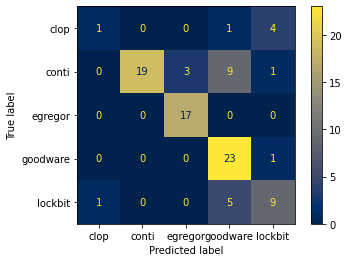

In [ ]:
# SVM com Grid Search CV PCA
param_gridsvm_PCA = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid_PCA = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid_PCA.fit(previsores_treinamento_pca, classe_treinamento)
predictsvm_pca = modelsvmgrid_PCA.predict(previsores_teste_pca)
print(metrics.classification_report(classe_teste, predictsvm_pca))
print(modelsvmgrid_PCA.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictsvm_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.12      0.17      0.14         6
       conti       0.69      0.28      0.40        32
     egregor       0.35      1.00      0.52        17
    goodware       0.78      0.29      0.42        24
     lockbit       0.87      0.87      0.87        15

    accuracy                           0.50        94
   macro avg       0.56      0.52      0.47        94
weighted avg       0.64      0.50      0.49        94

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


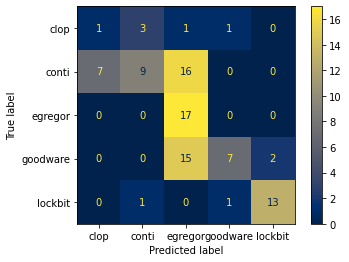

In [ ]:
# Naive Bayes com PCA
# No caso do Naive Bayes, não há hiperparâmetros para manipular, logo não faz sentido utilizar GridSearch
modelGNB_PCA = GaussianNB()
modelGNB_PCA.fit(previsores_treinamento_pca, classe_treinamento)
previsaoGNB_PCA = modelGNB_PCA.predict(previsores_teste_pca)
print(metrics.classification_report(classe_teste, previsaoGNB_PCA))
cm = metrics.confusion_matrix(classe_teste, previsaoGNB_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB_PCA.classes_).plot(cmap='cividis')
%time

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         6
       conti       0.87      0.84      0.86        32
     egregor       0.85      1.00      0.92        17
    goodware       0.80      1.00      0.89        24
     lockbit       1.00      0.87      0.93        15

    accuracy                           0.86        94
   macro avg       0.70      0.74      0.72        94
weighted avg       0.81      0.86      0.83        94

{'criterion': 'entropy', 'max_depth': 8}
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


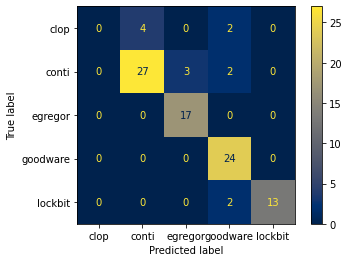

In [ ]:
# Decision Tree com Grid Search CV e PCA
param_gridtree_PCA = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid_PCA = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid_PCA.fit(previsores_treinamento_sc, classe_treinamento)
predicttree_PCA = modeltreegrid_PCA.predict(previsores_teste_sc)
print(metrics.classification_report(classe_teste, predicttree_PCA))
print(modeltreegrid_PCA.best_params_)
cm = metrics.confusion_matrix(classe_teste, predicttree_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       1.00      0.17      0.29         6
       conti       0.80      0.88      0.84        32
     egregor       0.89      1.00      0.94        17
    goodware       0.88      0.96      0.92        24
     lockbit       1.00      0.87      0.93        15

    accuracy                           0.87        94
   macro avg       0.92      0.77      0.78        94
weighted avg       0.88      0.87      0.86        94

{'criterion': 'entropy', 'n_estimators': 70}
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


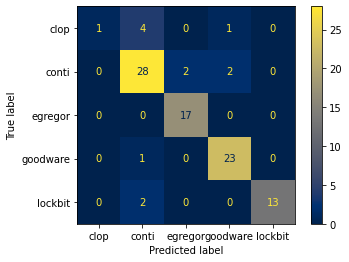

In [ ]:
# Random Forest com Grid Search CV e PCA

param_gridrf_PCA = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

#param_gridrf_PCA = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid_PCA = GridSearchCV(RandomForestClassifier(), param_gridrf_PCA, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid_PCA.fit(previsores_treinamento_pca, classe_treinamento)
predictrf_pca = modelrfgrid_PCA.predict(previsores_teste_pca)
print(metrics.classification_report(classe_teste, predictrf_pca))
print(modelrfgrid_PCA.best_params_)
cm = metrics.confusion_matrix(classe_teste, predictrf_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid_PCA.classes_).plot(cmap='cividis')
%time

Iteration 1, loss = 5.09331450
Iteration 2, loss = 1.73040735
Iteration 3, loss = 1.12193737
Iteration 4, loss = 0.99755587
Iteration 5, loss = 0.90569387
Iteration 6, loss = 0.87726445
Iteration 7, loss = 0.85716758
Iteration 8, loss = 0.81457130
Iteration 9, loss = 0.78573300
Iteration 10, loss = 0.77513902
Iteration 11, loss = 0.76073984
Iteration 12, loss = 0.73770717
Iteration 13, loss = 0.72585835
Iteration 14, loss = 0.72078378
Iteration 15, loss = 0.70867471
Iteration 16, loss = 0.69516379
Iteration 17, loss = 0.68935550
Iteration 18, loss = 0.68585417
Iteration 19, loss = 0.67691108
Iteration 20, loss = 0.66768601
Iteration 21, loss = 0.66333971
Iteration 22, loss = 0.65990174
Iteration 23, loss = 0.65381638
Iteration 24, loss = 0.64877880
Iteration 25, loss = 0.64676234
Iteration 26, loss = 0.64333333
Iteration 27, loss = 0.63760924
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CPU times: user 32 µs, sys: 5 µs, total: 37 µs
Wall time: 9.3 µs


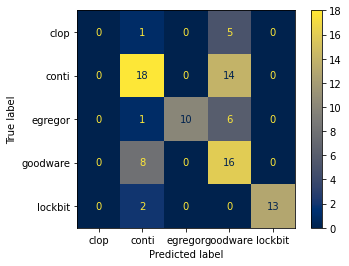

In [ ]:
# MLP com Grid Search CV e PCA
modelmlp_pca = MLPClassifier(hidden_layer_sizes=(500,200,10), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp_pca.fit(previsores_treinamento_pca, classe_treinamento)
predictmlp_pca = modelmlp_pca.predict(previsores_teste_pca)
print(metrics.classification_report(classe_teste, predictmlp_pca))
cm = metrics.confusion_matrix(classe_teste, predictmlp_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp_pca.classes_).plot(cmap='cividis')
%time